In [26]:
## 6.3 a,b ##
from scipy.linalg import lu
from numpy.linalg import solve
from numpy import matmul

A = [[2, 1, 4, 1],
     [3, 4,-1,-1],
     [1,-4, 1, 5],
     [2,-2, 1, 3]]
v = [[-4],[3],[9],[7]]
P, L, U = lu(A)
y = solve(L,v)
x = solve(U,y)
print(x)

[[ 4.41176471]
 [-4.86764706]
 [ 2.42647059]
 [-4.66176471]]


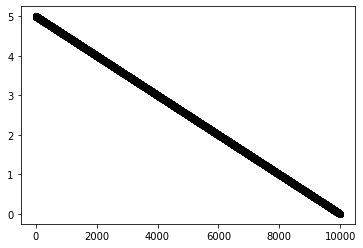

In [5]:
## 6.7 ##
  
from scipy.linalg import solve_banded
from scipy import zeros
from pylab import plot, show

# Constants
N = 10000
V_pos = 5 # volts

# create banded matrix
A = zeros([5, N], float)

A[2, 0] = A[2, N-1] = 3
for i in range(2, N):
    A[0, i] = -1

for i in range(1, N):
    A[1, i] = -1

for i in range(1, N-1):
    A[2, i] = 4

for i in range(N-1):
    A[3, i] = -1

for i in range(N-2):
    A[4, i] = -1

# create RHS vector
b = zeros(N)
b[0] = b[1] = V_pos

# solve system of equations
x = solve_banded((2,2), A, b)

# plot
plot(x, 'ko')
show()

In [6]:
## 6.8 (EC) ##
from scipy import zeros, empty, dot, sqrt, array, copy, identity
from scipy import transpose

def eigen_decomp(A, error):
    """
    gives the eigenvectors and eigenvalues of a symmetric matrix A with tolerance error using QR decomposition
    :param A: symmetric matrix
    :param error: positive float
    :return: a list with first element a matrix whose columns are the eigenvectors of A, and the second element
            a diagonal matrix with elements corresponding to the eigenvalues
    """
    N = A.shape[0]

    def QR_decomp(A):
        """
        returns a list containing arrays Q and R, the QR decomposition of a symmetric matrix A
        :param A: a symmetric array
        :return: a list of arrays
        """
        N = A.shape[0]
        Q = empty([ N, N ], float)
        R = zeros([ N, N ], float)

        # create q vectors
        A_columns = []
        for i in range(N):
            A_columns.append(A[:, i])

        def length_vector(v):
            return sqrt(dot(v, v))

        u_columns = [ copy(A_columns[0]) ]
        q_columns = [ copy(A_columns[0]) / length_vector(A_columns[0]) ]
        for i in range(1, N):
            u_columns.append(copy(A_columns[i]))
            for j in range(i):
                u_columns[i] -= dot(q_columns[j], A_columns[i]) * q_columns[j]
            q_columns.append(u_columns[i] / length_vector(u_columns[i]))

        # Create matrix Q
        for i in range(N):
            Q[:, i] = q_columns[i]

        # Create matrix R
        for i in range(N):
            for j in range(i, N):
                if i == j:
                    R[i, i] = length_vector(u_columns[i])
                else:
                    R[i, j] = dot(q_columns[i], A_columns[j])

        return [ Q, R ]

    def off_diags_small_enough(a):
        def is_good_enough(x):
            if abs(x) < error:
                return True
            else:
                return False

        for i in range(N):
            for j in range(N):
                if i == j:
                    continue
                else:
                    if not is_good_enough(a[i, j]):
                        return False
        return True

    V = identity(N)
    while(not off_diags_small_enough(A)):
        # Create matrix to store eigenvectors
        Q, R  = QR_decomp(A)

        # update A
        A = dot(R, Q)

        # update V
        V = dot(V, Q)
    return [ V, A ]

# test
A = array([ [1, 4, 8, 4],
            [4, 2, 3, 7],
            [8, 3, 6, 9],
            [4, 7, 9, 2] ], float)
[eigenvectors, eigenvalues] = eigen_decomp(A, 10 ** -6)
print(eigenvectors)
print(eigenvalues)

[[ 0.43151698 -0.38357064 -0.77459666 -0.25819889]
 [ 0.38357063  0.43151698 -0.2581989   0.77459667]
 [ 0.62330228  0.52740965  0.25819889 -0.51639778]
 [ 0.52740965 -0.62330227  0.51639779  0.25819889]]
[[ 2.10000000e+01  7.36067996e-07  3.58098914e-14 -4.71410140e-14]
 [ 7.36067998e-07 -8.00000000e+00  5.99038895e-08 -9.78974979e-15]
 [ 1.76373367e-14  5.99038974e-08 -3.00000000e+00 -2.06493959e-08]
 [ 5.69063112e-23  9.58659066e-16 -2.06493983e-08  1.00000000e+00]]


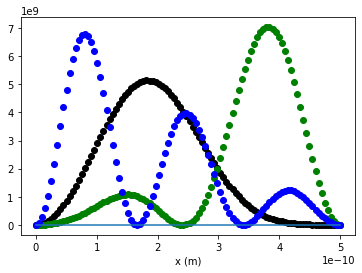

In [18]:
## 6.9 ##
from scipy import pi, empty, dot, sqrt, linspace, array, sin
from scipy.linalg import eigh, eigvalsh
from pylab import plot, show, xlabel, ylabel

# Constants
hbar = 6.582119514 * 10 ** -16 # in J * s
L = 5 * 10 ** -10 # in m
M = 9.1094 * 10 ** -31 # in kg
a = 10 # in eV


def h(m, n):
    def is_same_parity(m, n):
        return m % 2 == n % 2

    if m == n:
        return (pi ** 2 * hbar ** 2 * n ** 2) / (2 * M * L ** 2) * (1.6022 * 10 ** -19) + a / 2
    elif not is_same_parity(m, n):
        return - 8 * a / (pi ** 2)  * m * n / (m ** 2 - n ** 2) ** 2
    else:
        return 0

# Compare with 100 x 100
H = empty([ 100, 100 ], float)
for m in range(100):
    for n in range(100):
        H[m, n] = h(m + 1, n + 1)

E, psi = eigh(H)

# plot three lowest energy states

def V(x):
    return a * x / L

def psi_n(n, x):
    psi0 = 0
    for m in range(100):
        psi0 += sqrt(2 / L) * psi[n][m] * sin(pi * (m+1) * x / L)
    return psi0

def psi_0(x):
    return psi_n(0, x)

def psi_1(x):
    return psi_n(1, x)

def psi_2(x):
    return psi_n(2, x)

def square(x):
    return x ** 2

x = linspace(0, L, 100)
v = list(map(V, x))
psi0 = array(list(map(psi_0, x)))
psi1 = array(list(map(psi_1, x)))
psi2 = array(list(map(psi_2, x)))
psi0_squared = list(map(square, psi0))
psi1_squared = list(map(square, psi1))
psi2_squared = list(map(square, psi2))
plot(x, psi0_squared, 'ko')
plot(x, psi1_squared, 'go')
plot(x, psi2_squared, 'bo')
plot(x, v)
xlabel('x (m)')
show()

In [19]:
## 6.12 ##
from scipy import sqrt
# Find the stationary points of the system of equations x'(t) = -x + a*y + x^2 * y, y'(t) = b - a*y - x^2 y
# Note that the exact solutions are x = b, y = b / (a + b^2)

# Constants
a = 1
b = 2
accuracy = 10 ** -6

# We use a relaxation method to solve x = y(a + x^2), y = b / (a + x^2):

def f1(x, y):
    return y * (a + x ** 2)


def g1(x, y):
    return b / (a + x ** 2)


def f2(x, y):
    return sqrt(b / y - a)


def g2(x, y):
    return x / (a + x ** 2)


def stationary_points(f, g):
    """
    :param f: function for x = f(x,y)
    :param g: function for y = g(x,y)
    :return: a list [x, y] of the fixed points of the above system of equations
    """
    iterations = 1

    def relative_change(x1, x2):
        return (x1 - x2) / x1

    # starting values
    x1 = 0.5
    y1 = 0.25
    x2 = f(x1, y1)
    y2 = g(x1, y1)

    while abs(relative_change(x1, x2)) > accuracy and abs(relative_change(y1, y2)) > accuracy:
        if iterations > 1000000:
            print('number of iterations exceeded maximum')
            return 'error'

        x1, x2, y1, y2 = x2, f(x2, y2), y2, g(x2, y2)
        iterations += 1
    print('number of iterations = ', iterations)
    return [ x2, y2 ]

# if we try to use x = f1(x,y) and y = g1(x,y) to solve for the stationary points, the relaxation method fails
# but if we use f2 and g2 as defined above, which are just rearrangements of the original equations,
# the method nowconverges
print(stationary_points(f2, g2))

number of iterations =  27
[2.000001951414878, 0.4]


In [20]:
## 6.13 ##
from scipy import exp

# part a: solve 5 * e^-x + x - 5 = 0 using binary search
# Constants
accuracy = 10 ** -6

def find_root(f, x1, x2, accuracy):
    """
    finds the root of f(x) = 0 in the interval (x1, x2)
    :param f: function f(x)
    :param x1: lower bound of interval
    :param x2: upper bound of interval
    :param accuracy: target accuracy
    :return: float
    """

    def midpoint(x, y):
        return (x + y) / 2

    def have_same_sign(x, y):
        if x < 0 and y < 0 or x > 0 and y > 0:
            return True
        else:
            return False

    #
    while abs(x1 - x2) > accuracy:
        x = midpoint(x1, x2)
        if have_same_sign(f(x1), f(x)):
            x1 = x
        elif have_same_sign(f(x), f(x2)):
            x2 = x
        elif abs(x) < accuracy:
            return x

    return midpoint(x1, x2)

def f(x):
    return 5 * exp(-x) + x - 5

print(find_root(f, 4, 6, accuracy))


4.965114116668701


In [ ]:
## 6.16 ##

**6.17: a.** Kirchhoff current law says that the current flowing into and out of the point $V_2$ must be zero. There are three points of entry/exit of that point. The sum of which is:
$$ \frac{V_2-V_+}{R_3} + \frac{V_2}{R_4} - I_0[e^{{V_2-V_1}/{V_T}}-1] = 0 $$


In [21]:
## 6.17 ##
from scipy import exp, array, dot

# Constants
V_plus = 5  # Volts
R1 = 1000  # in ohms
R2 = 4000
R3 = 3000
R4 = 2000
I0 = 3 * 10 ** -9  # in amps
V_T = 0.05  # volts
accuracy = 0.0001  # volts

# Using Newton's method
def f(arr):
    return array([ (arr[0] - V_plus) / R1 + arr[0] / R2 + I0 * (exp((arr[0] - arr[1]) / V_T) - 1) ,
                   (V_plus - arr[1]) / R3 - arr[1] / R4 + I0 * (exp((arr[0] - arr[1]) / V_T) - 1)
    ],float)

def grad_f(arr):
    return array([ [ 1 / R1 + 1 / R2 + I0 / V_T * exp((arr[0] - arr[1]) / V_T), -I0 / V_T * exp((arr[0] - arr[1]) / V_T) ],
                   [ I0 / V_T * exp((arr[0] - arr[1]) / V_T), -1 / R3 - 1 / R4 - I0 / V_T * exp((arr[0] - arr[1]) / V_T) ] ]
    , float)


def inverse_matrix(arr):
    return 1 / (arr[0, 0] * arr[1, 1] - arr[0, 1] * arr[1, 0]) * array([ [ arr[1, 1], -arr[0, 1] ], [ -arr[1, 0], arr[0, 0] ] ], float)


x1 = array([3, 2.4], float)
delta_x = dot(inverse_matrix(grad_f(x1)),f(x1))
while abs(delta_x[0]) > accuracy or abs(delta_x[1]) > accuracy:
    delta_x = dot(inverse_matrix(grad_f(x1)), f(x1))
    x1 -= delta_x

print('V1 = ', x1[0], 'V')
print('V2 = ', x1[1], 'V')

V1 =  3.4469546569654286 V
V2 =  2.8295680145518567 V


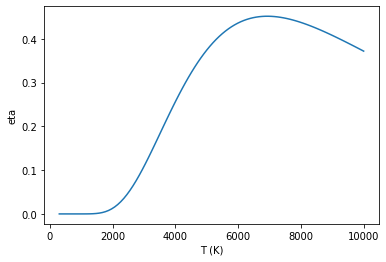

The temperature of max efficiency is 7235.961014189429 K


In [23]:
## 6.18 ##
from scipy import sqrt,exp,ones,copy,cos,tan,pi,linspace
from pylab import plot,show,xlabel,ylabel


######################################################################
#
# Functions to calculate integration points and weights for Gaussian
# quadrature
#
# x,w = gaussxw(N) returns integration points x and integration
#           weights w such that sum_i w[i]*f(x[i]) is the Nth-order
#           Gaussian approximation to the integral int_{-1}^1 f(x) dx
# x,w = gaussxwab(N,a,b) returns integration points and weights
#           mapped to the interval [a,b], so that sum_i w[i]*f(x[i])
#           is the Nth-order Gaussian approximation to the integral
#           int_a^b f(x) dx
#
# This code finds the zeros of the nth Legendre polynomial using
# Newton's method, starting from the approximation given in Abramowitz
# and Stegun 22.16.6.  The Legendre polynomial itself is evaluated
# using the recurrence relation given in Abramowitz and Stegun
# 22.7.10.  The function has been checked against other sources for
# values of N up to 1000.  It is compatible with version 2 and version
# 3 of Python.
#
# Written by Mark Newman <mejn@umich.edu>, June 4, 2011
# You may use, share, or modify this file freely
#
######################################################################


def gaussxw(N):

    # Initial approximation to roots of the Legendre polynomial
    a = linspace(3,4*N-1,N)/(4*N+2)
    x = cos(pi*a+1/(8*N*N*tan(a)))

    # Find roots using Newton's method
    epsilon = 1e-15
    delta = 1.0
    while delta>epsilon:
        p0 = ones(N,float)
        p1 = copy(x)
        for k in range(1,N):
            p0,p1 = p1,((2*k+1)*x*p1-k*p0)/(k+1)
        dp = (N+1)*(p0-x*p1)/(1-x*x)
        dx = p1/dp
        x -= dx
        delta = max(abs(dx))

    # Calculate the weights
    w = 2*(N+1)*(N+1)/(N*N*(1-x*x)*dp*dp)

    return x,w

def gaussxwab(N,a,b):
    x,w = gaussxw(N)
    return 0.5*(b-a)*x+0.5*(b+a),0.5*(b-a)*w

# Constants
z = (1 + sqrt(5)) / 2  # golden ratio
hc = 1.23984193 * 10 ** 3  # in eV * nm
lambda_1 = 390  # in nm
lambda_2 = 750  # in nm
kB = 8.6173303 * 10 ** -5  # in eV / K
lower_constant = hc / (lambda_2 * kB)
upper_constant = hc / (lambda_1 * kB)
accuracy = 1  # in K

def eta(T):
    def f(x):
        return x ** 3 / (exp(x) - 1)

    # We use Gaussian quadrature with N = 100 sample points
    N = 100
    x, w = gaussxwab(N, lower_constant / T, upper_constant / T)
    integral = 0.0
    for k in range(N):
        integral += w[k] * f(x[k])

    return 15 / pi ** 4 * integral

# Make plot of eta from T = 300 K to 10000 K
T = linspace(300, 10000, 100)
etas = list(map(eta, T))
plot(T, etas)
xlabel('T (K)')
ylabel(('eta'))
show()

# From plot, max efficiency near T = 7000 K
# Use golden ratio search to calculate temperature of maximum efficiency
# Initial points
T1 = 6000
T4 = 8000
T2 = T4 - (T4 - T1) / z
T3 = T4 + (T4 - T1) / z

# Initial values of eta
eta_1 = eta(T1)
eta_2 = eta(T2)
eta_3 = eta(T3)
eta_4 = eta(T4)

# golden ratio search loop
while T4 - T1 > accuracy:
    if eta_2 < eta_3 :
        T4, eta_4 = T3, eta_3
        T3, eta_3 = T2, eta_2
        T2 = T4 - (T4 - T1) / z
        eta_2 = eta(T2)
    else:
        T1, eta_1 = T2, eta_2
        T2, eta_2 = T3, eta_3
        T3 = T1 + (T4 - T1) / z
        eta_3 = eta(T3)

print('The temperature of max efficiency is', 0.5 * (T1 + T4), 'K')